In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SIZE = 1_000

In [3]:
def energy_consumption(distance, average_speed_kph, elevation_gain, time_of_departure_min, expected_precipitation):
    average_speed_ms = 1000/(60*60) * average_speed_kph
    
    rush_travel_duration_penalty = 444 * -np.cos(2*np.pi * time_of_departure_min/(24*60))/2 + 0.5
    
    duration_loss = 0.987 * distance/average_speed_ms + rush_travel_duration_penalty
    velocity_loss = 2 * average_speed_ms**2.2
    elevation_loss = 2500**(np.rad2deg(np.arctan(elevation_gain/distance))/90)
    weather_loss = 15 * np.log(expected_precipitation/10 + 0.1)
    noise = 13 * np.random.normal()

    return duration_loss + velocity_loss + elevation_loss + weather_loss + noise + 1000

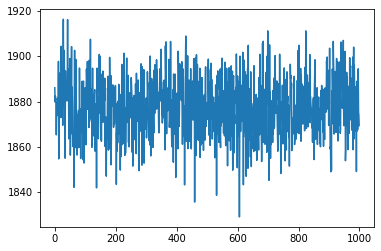

In [4]:
distance = 500
average_speed_kph = 50
elevation_gain = 0
time_of_departure_min = 12*60
expected_precipitation = 0

fig, ax = plt.subplots()
# ax.plot(energy_consumption(distance, average_speed, elevation_gain, time_of_departure, expected_precipitation))
ax.plot([energy_consumption(distance, average_speed_kph, elevation_gain, time_of_departure_min, expected_precipitation) for _ in range(1000)])
ax.ticklabel_format(useOffset=False)
plt.show()

In [5]:
energy_consumption(distance, average_speed_kph, elevation_gain, time_of_departure_min, expected_precipitation)

1880.1291124238817

In [6]:
input_sample_ranges = {
    'distance': [500, 50000],
    'average_speed_kph': [10, 100],
    'elevation_gain_pct': [0, 0.15],
    'time_of_departure_min': [0, 24*60],
    'expected_precipitation': [0, 10],
}

data = {}
for key, (x_min, x_max) in input_sample_ranges.items():
    if key == 'elevation_gain_pct':
        data['elevation_gain'] = np.around(np.random.uniform(low=x_min, high=x_max, size=(SIZE,)) * data['distance'], decimals=1)
    else:
        data[key] = np.around(np.random.uniform(low=x_min, high=x_max, size=(SIZE,)), decimals=1)

data['energy_consumption'] = np.around(energy_consumption(**data), decimals=0)

df = pd.DataFrame.from_records(data)
df = df[list(df.drop(columns='energy_consumption').columns) + ['energy_consumption']]
# df['energy_consumption'] = df.apply(lambda x: energy_consumption(x['distance'], x['average_speed'], x['elevation_gain'], x['time_of_departure'], x['expected_precipitation']))
df.head()

,average_speed_kph,distance,elevation_gain,expected_precipitation,time_of_departure_min,energy_consumption
0,88.5,22855.9,2365.4,5.6,61.3,4033.0
1,72.1,38268.0,5302.5,8.9,52.7,4174.0
2,15.1,11561.5,1211.6,6.0,844.1,3995.0
3,56.9,42697.4,6108.0,2.6,906.8,4714.0
4,86.3,21826.6,1833.6,3.7,128.0,3911.0


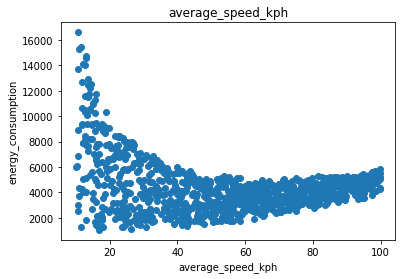

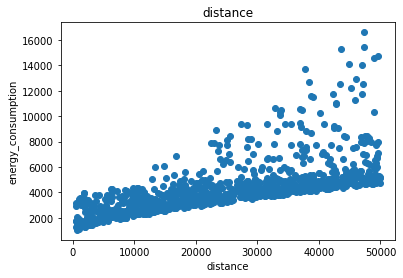

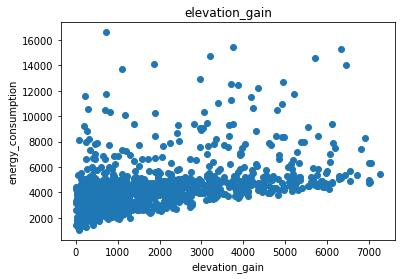

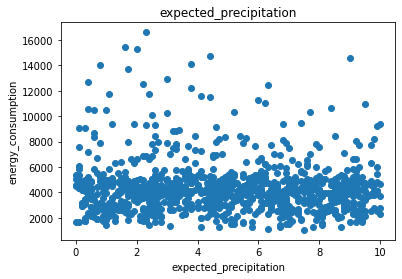

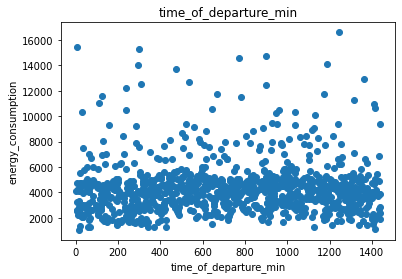

In [7]:
for col in df.drop(columns='energy_consumption'):
    plt.scatter(df[col], df['energy_consumption'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('energy_consumption')
    plt.show()

In [9]:
df.to_csv('data.csv', index=False)